# SVR

In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## polynomial kernel

c:\Users\gandh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.901570104998674
RMSE:  1.1578145390548735


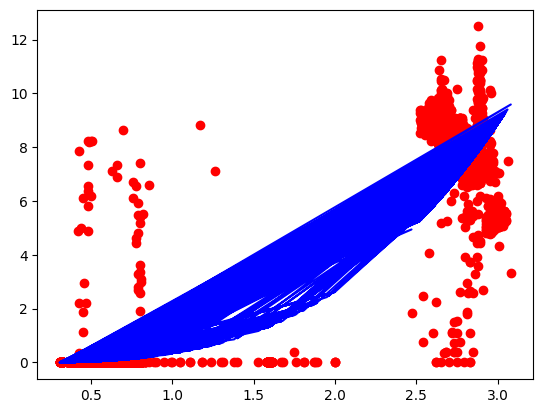

In [2]:
# Reading the dataset
df = pd.read_excel('ph0100(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure', 'flowrate_manual']]
# df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure']).reshape(-1, 1)
y = np.array(df_binary['flowrate_manual']).reshape(-1, 1)
# X = df_binary.iloc[:, -1].values
# y = df_binary.iloc[:, 0].values

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting the Regression Model to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'poly')
regressor.fit(X_train, y_train)

# predicting the test set results
y_pred = regressor.predict(X_test)
y_pred = y_pred.reshape(-1, 1)

# Visualising the SVR results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')

# Check accuracy
from sklearn.metrics import r2_score
print('Accuracy: ', r2_score(y_test, y_pred))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', rms)


## rbf kernel

c:\Users\gandh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.9820530861191482
RMSE:  0.4943907964382031


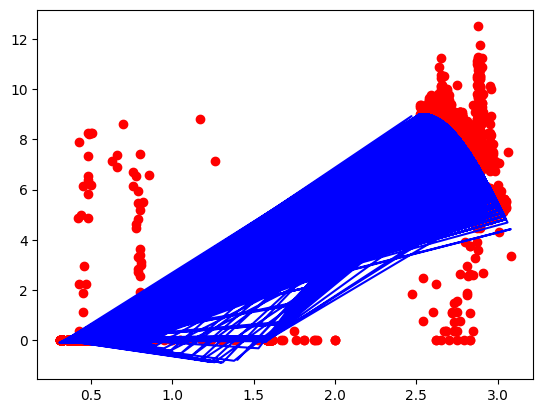

In [3]:
# Reading the dataset
df = pd.read_excel('ph0100(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure', 'flowrate_manual']]
# df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure']).reshape(-1, 1)
y = np.array(df_binary['flowrate_manual']).reshape(-1, 1)
# X = df_binary.iloc[:, -1].values
# y = df_binary.iloc[:, 0].values

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting the Regression Model to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

# predicting the test set results
y_pred = regressor.predict(X_test)
y_pred = y_pred.reshape(-1, 1)

# Visualising the SVR results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')

# Check accuracy
from sklearn.metrics import r2_score
print('Accuracy: ', r2_score(y_test, y_pred))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', rms)


## linear kernel

c:\Users\gandh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.9378017567276203
RMSE:  0.9203744357886958


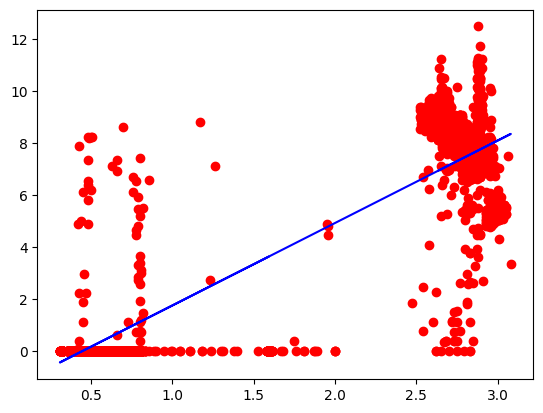

In [4]:
# Reading the dataset
df = pd.read_excel('ph0100(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure', 'flowrate_manual']]
# df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure']).reshape(-1, 1)
y = np.array(df_binary['flowrate_manual']).reshape(-1, 1)
# X = df_binary.iloc[:, -1].values
# y = df_binary.iloc[:, 0].values

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting the Regression Model to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear')
regressor.fit(X_train, y_train)

# predicting the test set results
y_pred = regressor.predict(X_test)
y_pred = y_pred.reshape(-1, 1)

# Visualising the SVR results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')

# Check accuracy
from sklearn.metrics import r2_score
print('Accuracy: ', r2_score(y_test, y_pred))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', rms)


# After Discretization
## polynomial kernel

In [5]:
# discretize the data
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=100, encode='ordinal', strategy='uniform')
est.fit(X)
X_binned = est.transform(X)
X_binned = X_binned.astype(int)


c:\Users\gandh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.8943511761875654
RMSE:  1.1995209049277507


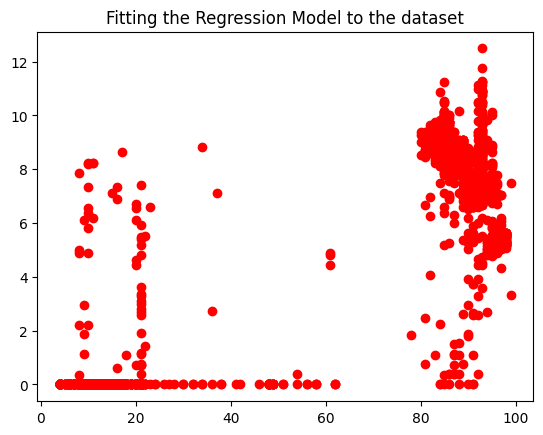

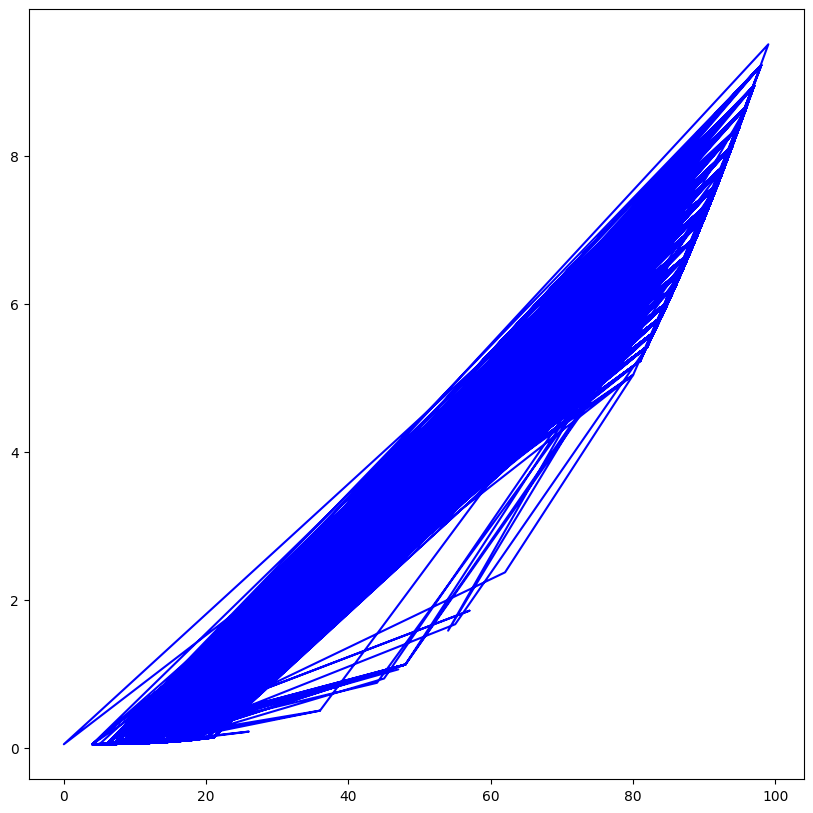

In [6]:
# regression using X_binned
X_train, X_test, y_train, y_test = train_test_split(X_binned, y, test_size = 0.2, random_state = 0)
regressor = SVR(kernel = 'poly')
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
y_pred = y_pred.reshape(-1, 1)
# y_pred = sc_y.inverse_transform(y_pred)

# Visualising the Regression results
plt.scatter(X_train, y_train, color = 'red')
# plt.plot(X_binned, regressor.predict(X_binned), color = 'blue')
plt.title('Fitting the Regression Model to the dataset')

# Check accuracy
from sklearn.metrics import r2_score
print('Accuracy: ', r2_score(y_test, y_pred))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', rms)
figure = plt.figure(figsize=(10, 10))
plt.plot(X_test, regressor.predict(X_test), color = 'blue')

## rbf kernel

c:\Users\gandh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.9820983431941146
RMSE:  0.49376704560939094


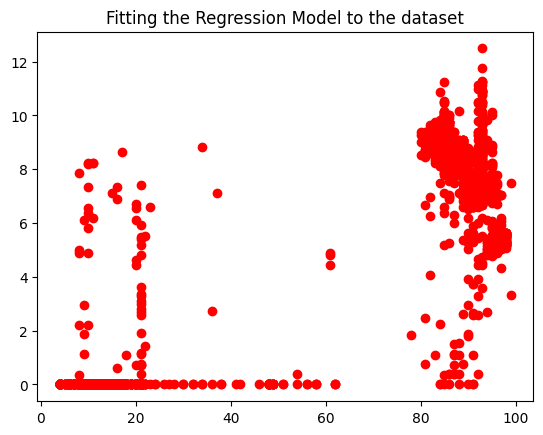

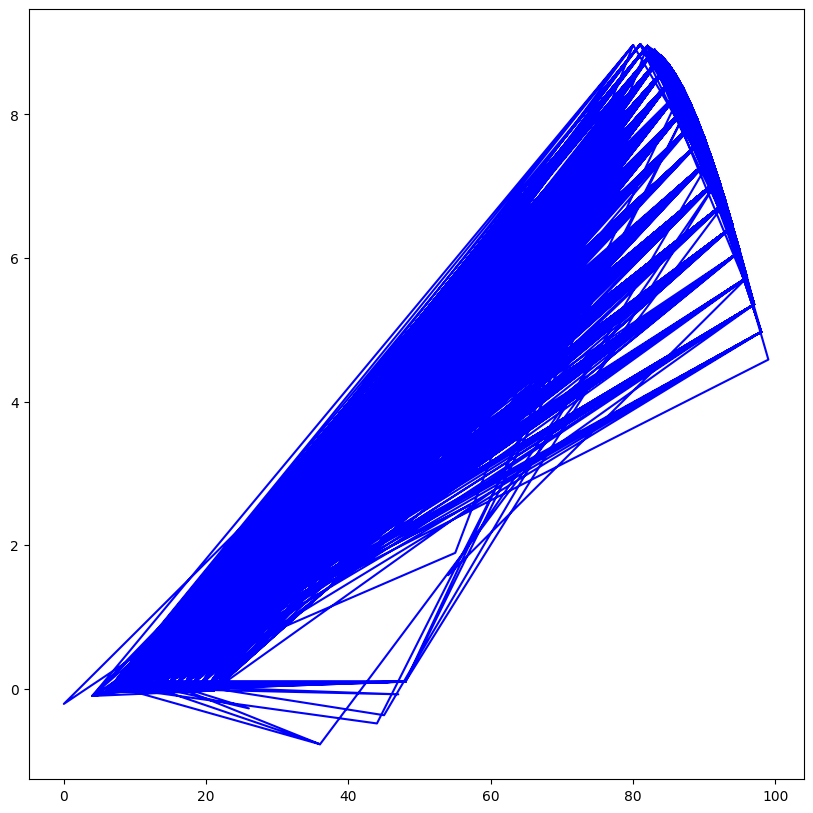

In [7]:
# regression using X_binned
X_train, X_test, y_train, y_test = train_test_split(X_binned, y, test_size = 0.2, random_state = 0)
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
y_pred = y_pred.reshape(-1, 1)
# y_pred = sc_y.inverse_transform(y_pred)

# Visualising the Regression results
plt.scatter(X_train, y_train, color = 'red')
# plt.plot(X_binned, regressor.predict(X_binned), color = 'blue')
plt.title('Fitting the Regression Model to the dataset')

# Check accuracy
from sklearn.metrics import r2_score
print('Accuracy: ', r2_score(y_test, y_pred))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', rms)
figure = plt.figure(figsize=(10, 10))
plt.plot(X_test, regressor.predict(X_test), color = 'blue')

## linear kernel

c:\Users\gandh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.9377720903353737
RMSE:  0.9205939028715217


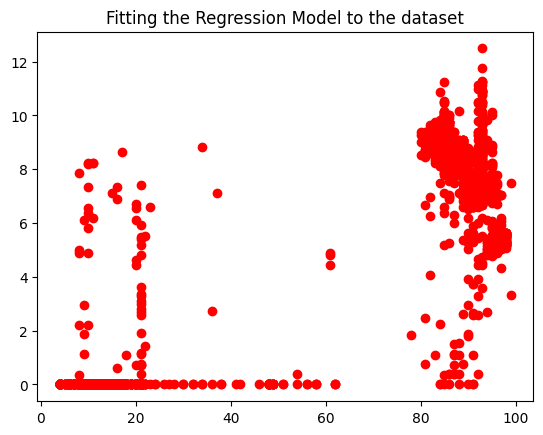

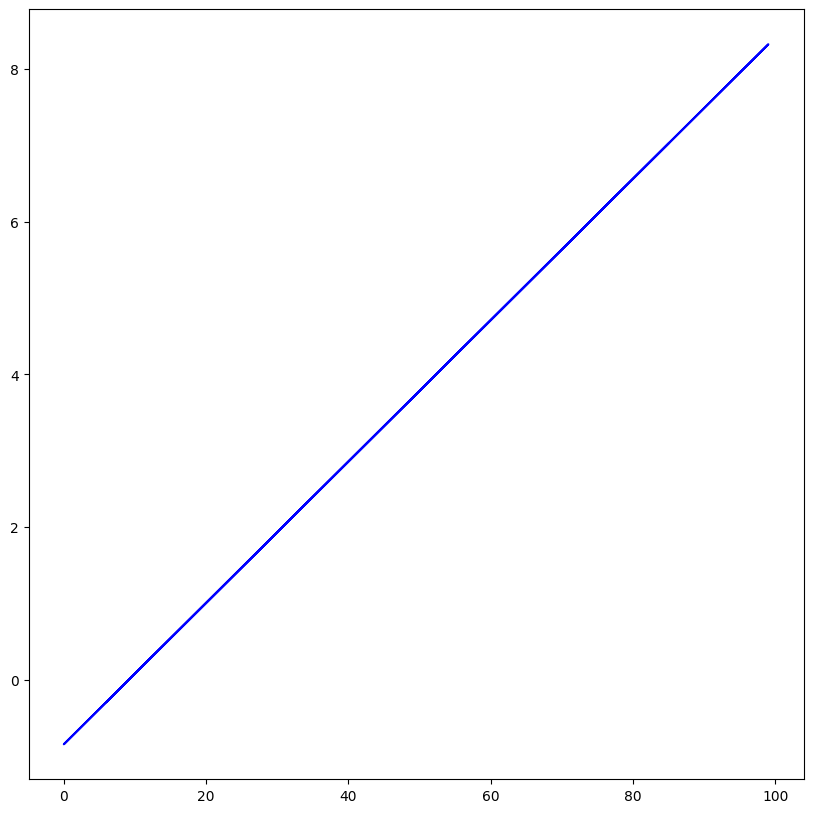

In [8]:
# regression using X_binned
X_train, X_test, y_train, y_test = train_test_split(X_binned, y, test_size = 0.2, random_state = 0)
regressor = SVR(kernel = 'linear')
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
y_pred = y_pred.reshape(-1, 1)
# y_pred = sc_y.inverse_transform(y_pred)

# Visualising the Regression results
plt.scatter(X_train, y_train, color = 'red')
# plt.plot(X_binned, regressor.predict(X_binned), color = 'blue')
plt.title('Fitting the Regression Model to the dataset')

# Check accuracy
from sklearn.metrics import r2_score
print('Accuracy: ', r2_score(y_test, y_pred))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', rms)
figure = plt.figure(figsize=(10, 10))
plt.plot(X_test, regressor.predict(X_test), color = 'blue')

## PH0303(2)

In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

c:\Users\gandh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.9498529076173714
RMSE:  0.5031209610145982


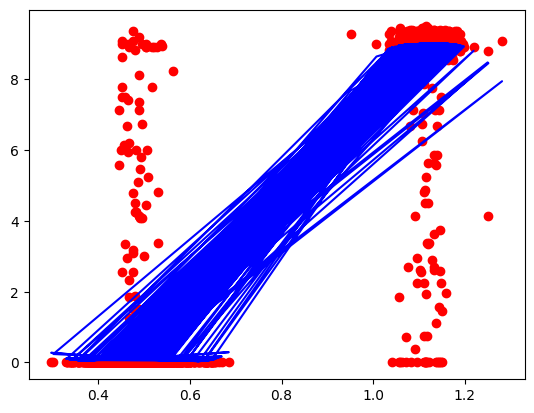

In [2]:
# Reading the dataset
df = pd.read_excel('ph0303(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure_voltage', 'flowrate_manual']]
# df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure_voltage']).reshape(-1, 1)
y = np.array(df_binary['flowrate_manual']).reshape(-1, 1)
# X = df_binary.iloc[:, -1].values
# y = df_binary.iloc[:, 0].values


# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting the Regression Model to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

# predicting the test set results
y_pred = regressor.predict(X_test)
y_pred = y_pred.reshape(-1, 1)

# Visualising the SVR results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')

# Check accuracy
from sklearn.metrics import r2_score
print('Accuracy: ', r2_score(y_test, y_pred))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', rms)


## PH0302(2)

c:\Users\gandh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.9425187490389311
RMSE:  0.4918528638622972


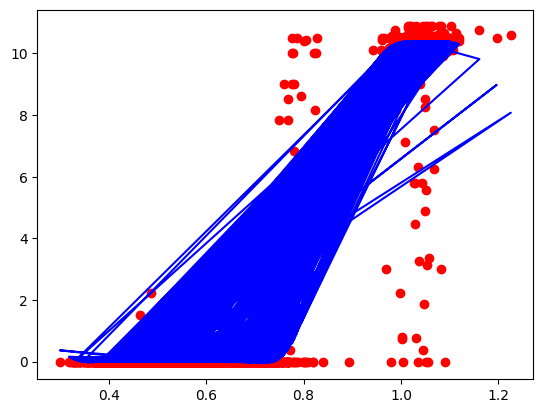

In [4]:
# Reading the dataset
df = pd.read_excel('ph0302(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure_voltage', 'flowrate_manual']]
# df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure_voltage']).reshape(-1, 1)
y = np.array(df_binary['flowrate_manual']).reshape(-1, 1)
# X = df_binary.iloc[:, -1].values
# y = df_binary.iloc[:, 0].values


# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting the Regression Model to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

# predicting the test set results
y_pred = regressor.predict(X_test)
y_pred = y_pred.reshape(-1, 1)

# Visualising the SVR results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')

# Check accuracy
from sklearn.metrics import r2_score
print('Accuracy: ', r2_score(y_test, y_pred))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', rms)


# CNN

Epoch 1/100
658/658 [==============================] - 2s 2ms/step - loss: 0.6087 - mean_absolute_error: 0.6087 - mean_squared_error: 1.9530 - val_loss: 0.4215 - val_mean_absolute_error: 0.4215 - val_mean_squared_error: 0.8136
Epoch 2/100
658/658 [==============================] - 1s 2ms/step - loss: 0.4249 - mean_absolute_error: 0.4249 - mean_squared_error: 0.8657 - val_loss: 0.4234 - val_mean_absolute_error: 0.4234 - val_mean_squared_error: 0.8094
Epoch 3/100
658/658 [==============================] - 1s 2ms/step - loss: 0.4225 - mean_absolute_error: 0.4225 - mean_squared_error: 0.8609 - val_loss: 0.4152 - val_mean_absolute_error: 0.4152 - val_mean_squared_error: 0.7659
Epoch 4/100
658/658 [==============================] - 1s 2ms/step - loss: 0.4193 - mean_absolute_error: 0.4193 - mean_squared_error: 0.8442 - val_loss: 0.4147 - val_mean_absolute_error: 0.4147 - val_mean_squared_error: 0.7601
Epoch 5/100
658/658 [==============================] - 1s 2ms/step - loss: 0.4168 - mean_abs

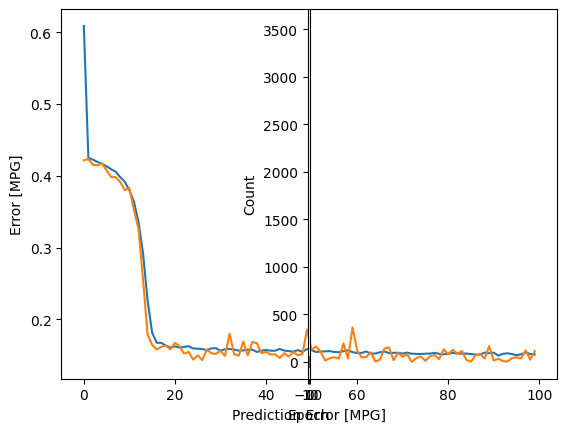

In [9]:
# CNN with 2 layers, ReLU activation, and 1 L2 loss
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Reading the dataset
df = pd.read_excel('ph0100(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure', 'flowrate_manual']]
# df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure']).reshape(-1, 1)
y = np.array(df_binary['flowrate_manual']).reshape(-1, 1)
# X = df_binary.iloc[:, -1].values
# y = df_binary.iloc[:, 0].values

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# CNN
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[1]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mean_absolute_error',
    metrics=['mean_absolute_error', 'mean_squared_error'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=100)

# Plotting the loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')

# Predictions
test_predictions = model.predict(X_test).flatten()

# Plotting the predictions
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')

# Error distribution
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')



In [10]:
# Score of CNN
from sklearn.metrics import r2_score
print('Accuracy: ', r2_score(y_test, test_predictions))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, test_predictions))
print('RMSE: ', rms)

Accuracy:  0.9813236188162527
RMSE:  0.5043381866084208


## Ph0303(2)

Epoch 1/100
656/656 [==============================] - 6s 6ms/step - loss: 0.4256 - mean_absolute_error: 0.4256 - mean_squared_error: 3.2077 - val_loss: 0.0906 - val_mean_absolute_error: 0.0906 - val_mean_squared_error: 0.2605
Epoch 2/100
656/656 [==============================] - 2s 4ms/step - loss: 0.0754 - mean_absolute_error: 0.0754 - mean_squared_error: 0.2945 - val_loss: 0.0627 - val_mean_absolute_error: 0.0627 - val_mean_squared_error: 0.2584
Epoch 3/100
656/656 [==============================] - 2s 3ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_squared_error: 0.2926 - val_loss: 0.0758 - val_mean_absolute_error: 0.0758 - val_mean_squared_error: 0.2570
Epoch 4/100
656/656 [==============================] - 2s 3ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_squared_error: 0.2947 - val_loss: 0.0646 - val_mean_absolute_error: 0.0646 - val_mean_squared_error: 0.2627
Epoch 5/100
656/656 [==============================] - 3s 4ms/step - loss: 0.0691 - mean_abs

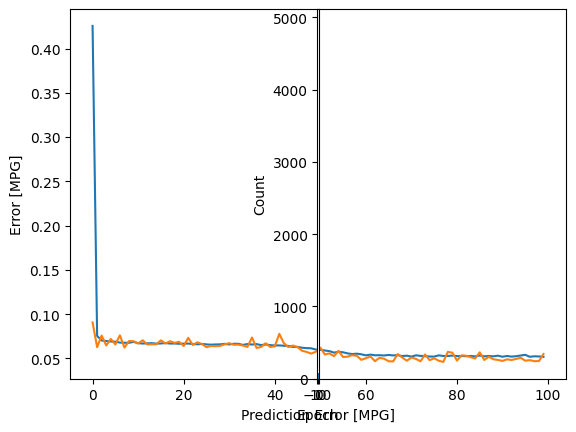

In [15]:
# CNN with 2 layers, ReLU activation, and 1 L2 loss
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Reading the dataset
df = pd.read_excel('ph0303(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure_voltage', 'flowrate_manual']]
# df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure_voltage']).reshape(-1, 1)
y = np.array(df_binary['flowrate_manual']).reshape(-1, 1)
# X = df_binary.iloc[:, -1].values
# y = df_binary.iloc[:, 0].values

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# CNN
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[1]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mean_absolute_error',
    metrics=['mean_absolute_error', 'mean_squared_error'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=100)

# Plotting the loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')

# Predictions
test_predictions = model.predict(X_test).flatten()

# Plotting the predictions
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')

# Error distribution
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

# Score of CNN
from sklearn.metrics import r2_score
print('Accuracy: ', r2_score(y_test, test_predictions))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, test_predictions))
print('RMSE: ', rms)

## PH0302(2)

Epoch 1/100
666/666 [==============================] - 10s 12ms/step - loss: 0.4109 - mean_absolute_error: 0.4109 - mean_squared_error: 4.1319 - val_loss: 0.4211 - val_mean_absolute_error: 0.4211 - val_mean_squared_error: 4.1847
Epoch 2/100
666/666 [==============================] - 7s 11ms/step - loss: 0.3726 - mean_absolute_error: 0.3726 - mean_squared_error: 3.2812 - val_loss: 0.3308 - val_mean_absolute_error: 0.3308 - val_mean_squared_error: 2.4439
Epoch 3/100
666/666 [==============================] - 4s 5ms/step - loss: 0.1915 - mean_absolute_error: 0.1915 - mean_squared_error: 0.8676 - val_loss: 0.0918 - val_mean_absolute_error: 0.0918 - val_mean_squared_error: 0.2525
Epoch 4/100
666/666 [==============================] - 3s 5ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_squared_error: 0.1530 - val_loss: 0.0720 - val_mean_absolute_error: 0.0720 - val_mean_squared_error: 0.2449
Epoch 5/100
666/666 [==============================] - 3s 4ms/step - loss: 0.0576 - mean_

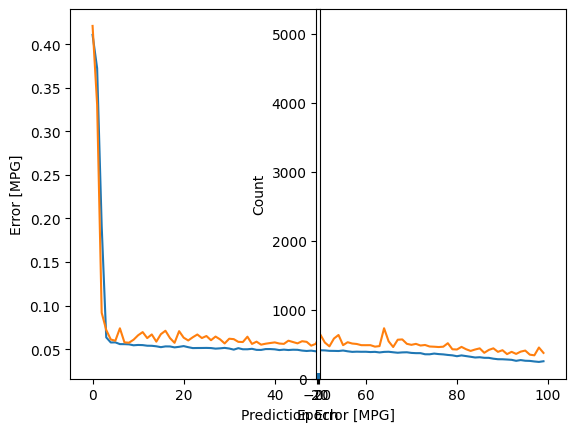

In [16]:
# CNN with 2 layers, ReLU activation, and 1 L2 loss
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Reading the dataset
df = pd.read_excel('ph0302(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure_voltage', 'flowrate_manual']]
# df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure_voltage']).reshape(-1, 1)
y = np.array(df_binary['flowrate_manual']).reshape(-1, 1)
# X = df_binary.iloc[:, -1].values
# y = df_binary.iloc[:, 0].values

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# CNN
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[1]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mean_absolute_error',
    metrics=['mean_absolute_error', 'mean_squared_error'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=100)

# Plotting the loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')

# Predictions
test_predictions = model.predict(X_test).flatten()

# Plotting the predictions
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')

# Error distribution
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

# Score of CNN
from sklearn.metrics import r2_score
print('Accuracy: ', r2_score(y_test, test_predictions))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, test_predictions))
print('RMSE: ', rms)